<a href="https://colab.research.google.com/github/farnooshoa/Superstore/blob/main/Supoerstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

/tmp/ipython-input-532016175.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Category')['Profit'].sum())


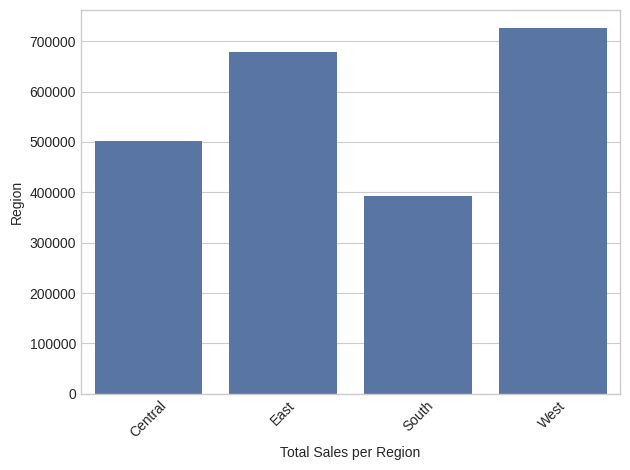

/tmp/ipython-input-532016175.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit Margin', data=df, palette='Set2')


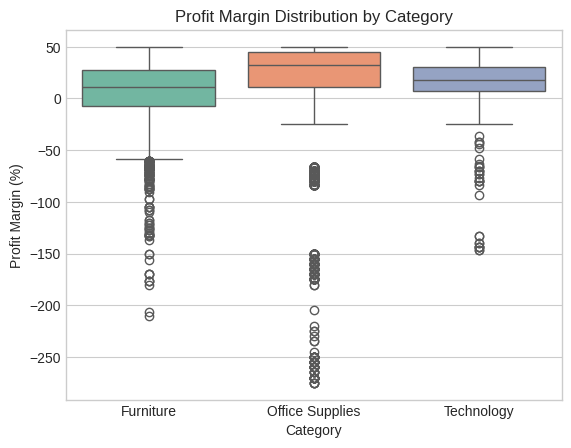

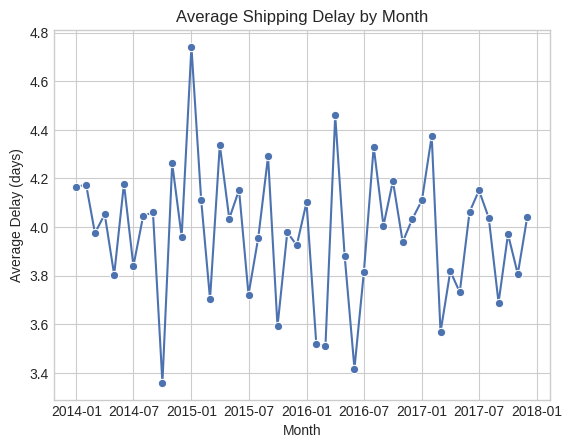

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')

df=pd.read_csv('/content/Superstore.csv',encoding='ISO-8859-1')

# Display first few rows
print(df.head())

print(df.shape)      # rows, columns
print(df.info())     # datatypes and null counts
print(df.describe()) # numeric stats
df.columns
# Clean data:
    # Handle missing values (drop or fill)
print(df.isna().sum())
    # Fix datatypes if needed

df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Category']=df['Category'].astype('category')
    # Create at least 2 new columns (e.g., profit margin, revenue per customer)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

#Exploratory analysis:
    # Groupby at least 2 variables (e.g., sales by region, profit by category)
print(df.groupby('Region')['Sales'].sum())
print(df.groupby('Category')['Profit'].sum())
    # At least 3 visualizations (bar chart, histogram, boxplot/scatter)
region_sale= df.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(y='Sales', x='Region', data=region_sale)
plt.xlabel('Total Sales per Region')
plt.ylabel('Region')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

sns.boxplot(x='Category', y='Profit Margin', data=df, palette='Set2')
plt.title('Profit Margin Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.show()


df['Ship Delay'] = (df['Ship Date'] - df['Order Date']).dt.days
monthly_delay = df.groupby(df['Order Date'].dt.to_period('M'))['Ship Delay'].mean().reset_index()
monthly_delay['Order Date'] = monthly_delay['Order Date'].dt.to_timestamp()

sns.lineplot(x='Order Date', y='Ship Delay', data=monthly_delay, marker='o')
plt.title('Average Shipping Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (days)')
plt.show()
#Insights:
    # Write 5 bullet points of findings in markdown.